# True color using ds9

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 198
download_chandra_obsid 198 evt2
mv -fv 198/primary/*evt2.fits.gz ./
gunzip -f *fits.gz


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       25 Mb  ####################          < 1 s  97680.7 kb/s

'198/primary/acisf00198N005_evt2.fits.gz' -> './acisf00198N005_evt2.fits.gz'


In [3]:
dmcopy infile="acisf00198N005_evt2.fits[energy=200:1500]" \
      outfile="red_198.fits" clob+

dmcopy infile="acisf00198N005_evt2.fits[energy=1500:2500]" \
      outfile="green_198.fits" clob+

dmcopy infile="acisf00198N005_evt2.fits[energy=2500:8000]" \
      outfile="blue_198.fits" clob+

[1] 46225
[1]+  Done                    ds9 -rgb -red red_198.fits -bin factor 2 -scale limits 0.255 10 -scale asinh -smooth yes -smooth radius 1 -pan to 4100 4000 physical -green green_198.fits -bin factor 2 -scale limits 0.255 18 -scale asinh -smooth yes -smooth radius 1 -pan to 4100 4000 physical -blue blue_198.fits -bin factor 2 -scale limits 0.0779 5 -scale asinh -smooth yes -smooth radius 1 -pan to 4100 4000 physical -grid yes -grid grid no -grid border no -grid axes type exterior -saveimage png ds9_01.png


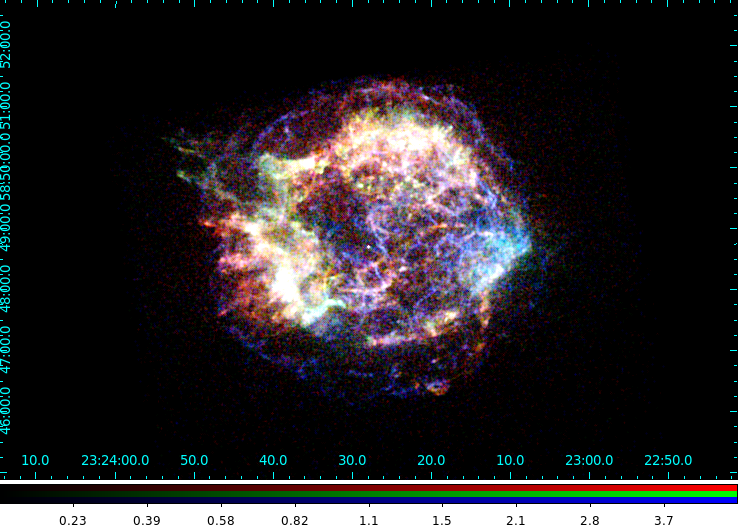

In [4]:
ds9 -rgb \
  -red red_198.fits -bin factor 2 -scale limits 0.255 10 \
  -scale asinh -smooth yes -smooth radius 1 \
  -pan to 4100 4000 physical \
  -green green_198.fits -bin factor 2 -scale limits 0.255 18 \
  -scale asinh -smooth  yes -smooth radius 1\
  -pan to 4100 4000 physical \
  -blue blue_198.fits -bin factor 2 -scale limits 0.0779 5 \
  -scale asinh -smooth  yes -smooth radius 1\
  -pan to 4100 4000 physical \
  -grid yes \
  -grid grid no \
  -grid border no \
  -grid axes type exterior \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png



## dmimg2jpg

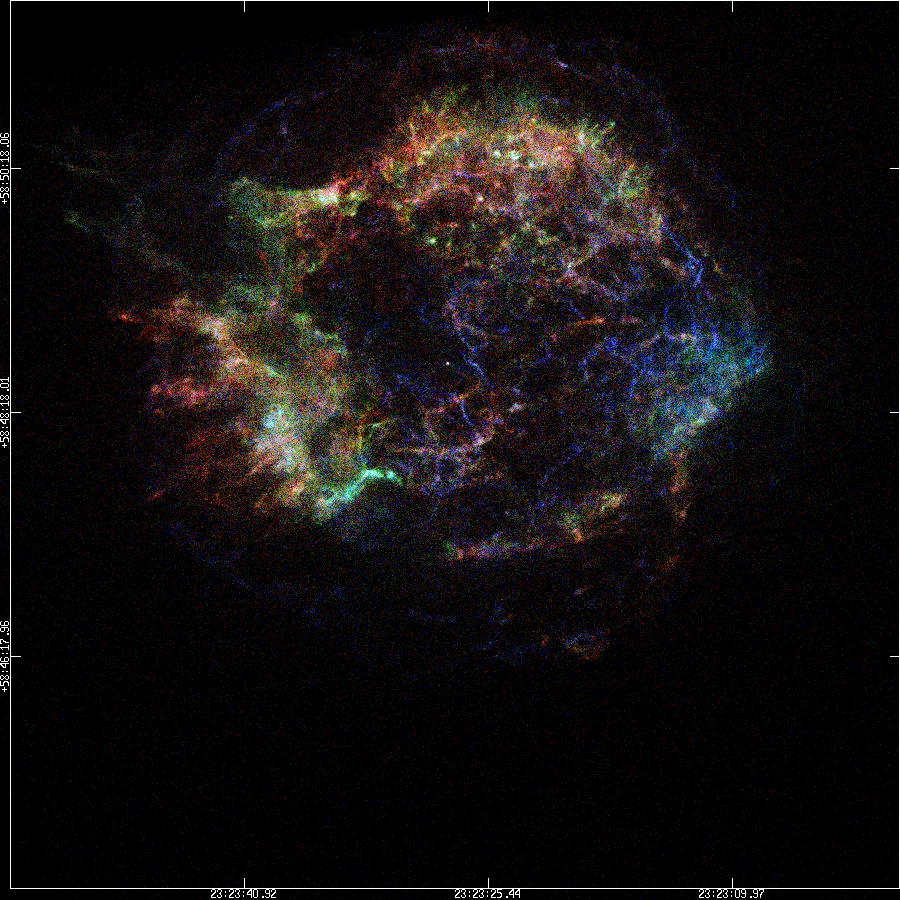

In [5]:
dmimg2jpg infile="red_198.fits[bin x=3650:4550:1,y=3450:4350:1]" \
      greenfile="green_198.fits[bin x=3650:4550:1,y=3450:4350:1]" \
      bluefile="blue_198.fits[bin x=3650:4550:1,y=3450:4350:1]" \
      scalefunction="log" scaleparam="1" \
      minred="0.255" mingreen="0.255" minblue="0.0779" \
      maxred="10" maxgreen="18" maxblue="5" \
      showaimpoint="no" showlabel="no" showgrid="yes" fontsize="1" \
      outfile="dmimg2jpg.jpg" psfile="dmimg2jpg.ps" clob+
    
display < dmimg2jpg.jpg

# Cleanup


In [6]:
/bin/rm -rf 198 acisf* 